# Assignment 1 - Parker Woodard

In [33]:
# Imports for questions 1/2 + timer decorator
from itertools import combinations
import time
import seaborn
import functools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats 
from sklearn import datasets
from heap_sort import heap_sort
from sklearn.decomposition import PCA

def timer(func):
    @functools.wraps(func)
    def wrapper_timer(*args, **kwargs):
        tic = time.perf_counter()
        value = func(*args, **kwargs)
        toc = time.perf_counter()
        elapsed_time = toc - tic
        print(f"Elapsed time: {elapsed_time:0.4f} seconds")
        return value
    return wrapper_timer

# Load the iris data set
iris_data = datasets.load_iris()

# Problem 1(a)

In [34]:
def iris_statistics():
    # Loop through each class and through each feature in that class
    for target in range(len(iris_data.target_names)):
        print(f"Class: {iris_data.target_names[target]}")
        class_data = iris_data.data[iris_data.target == target]
        data_as_array = np.array([
            class_data.min(axis=0).tolist(), 
            class_data.max(axis=0).tolist(),
            class_data.mean(axis=0).tolist(),
            class_data.std(axis=0).tolist(),
            stats.trim_mean(class_data, 0.1, axis=0).tolist(),
            stats.trim_mean(class_data, 5/len(class_data), axis=0).tolist(),
            stats.skew(class_data, axis=0).tolist(),
            stats.kurtosis(class_data, axis=0).tolist()
        ])

        # Labels for our rows and columns
        columns = [feature_name for feature_name in iris_data.feature_names]
        rows = ['Min', 'Max', 'Mean', 'Standard Deviation', 'Trimmed Mean', 'Alpha Trimmed Mean', 'Skewness', 'Kurtosis']

        # Convert the NumPy array to a DataFrame with row and column labels for nice formatting
        df = pd.DataFrame(data_as_array, index=rows, columns=columns)
        print(df)

iris_statistics()

Class: setosa
                    sepal length (cm)  sepal width (cm)  petal length (cm)  \
Min                          4.300000          2.300000           1.000000   
Max                          5.800000          4.400000           1.900000   
Mean                         5.006000          3.428000           1.462000   
Standard Deviation           0.348947          0.375255           0.171919   
Trimmed Mean                 5.002500          3.415000           1.460000   
Alpha Trimmed Mean           5.002500          3.415000           1.460000   
Skewness                     0.116454          0.039921           0.103175   
Kurtosis                    -0.345765          0.744222           0.804592   

                    petal width (cm)  
Min                         0.100000  
Max                         0.600000  
Mean                        0.246000  
Standard Deviation          0.104326  
Trimmed Mean                0.237500  
Alpha Trimmed Mean          0.237500  
Skewness  

# Problem 1(b)

## We can make the following conclusions from the data

### Sepal Length and Width
* The sepal lengths and widths vary across the different classes, with virginica generally having the longest sepals and setosa the shortest.
* Setosa has the widest sepals on average, virginica and versicolor have similar widths.
### Petal Length and Width
* Petal lengths and widths show the most significant differences among the classes.
* Setosa has the shortest and narrowest petals, while virginica has the longest and widest.
* Versicolor falls between setosa and virginica in terms of petal size, but its petals are closer in size to virginica.
### Distribution Statistics
* The mean, trimmed mean, and alpha trimmed mean provide different ways to estimate the central tendency of the data, with the trimmed and alpha trimmed means being less sensitive to outliers.
* Skewness measures the symmetry of the distribution. Positive skewness indicates a longer tail on the right, while negative skewness indicates a longer tail on the left.
* Kurtosis measures the "peakedness" of the distribution. Higher kurtosis indicates a more peaked distribution, while lower kurtosis indicates a flatter distribution.
### Overall Analysis
* The differences in means, standard deviations, skewness, and kurtosis suggest that the classes are distinct in terms of these features.
* These differences can be used to classify iris flowers based on their sepal and petal measurements.

# Problem 2(a)

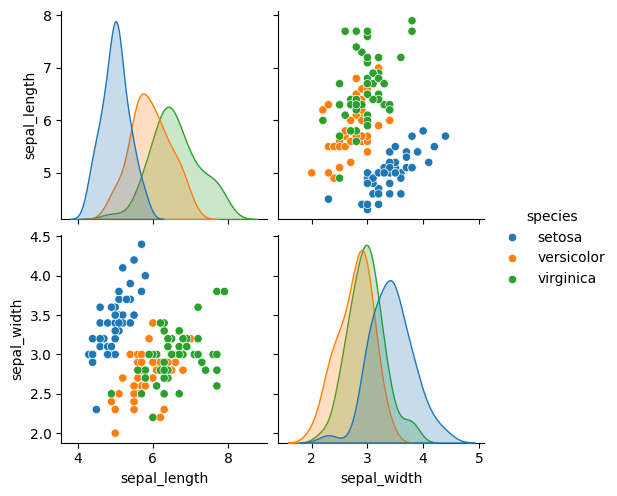

In [35]:
def seaborn_plots():
    df = seaborn.load_dataset("iris")
    subset_df = df[["sepal_length", "sepal_width", "species"]]
    seaborn.pairplot(subset_df, hue="species")
    plt.show()
seaborn_plots()

# Problem 2(b)

In [36]:
@timer
def sort_iris_data():
    for target in range(len(iris_data.target_names)):
        print(f"Class: {iris_data.target_names[target]}")
        for feature in range(len(iris_data.feature_names)):
            data_copy = iris_data.data[iris_data.target == target][:, feature].copy()
            heap_sort(data_copy)
            print(data_copy)
sort_iris_data()

Class: setosa
[4.3 4.4 4.4 4.4 4.5 4.6 4.6 4.6 4.6 4.7 4.7 4.8 4.8 4.8 4.8 4.8 4.9 4.9
 4.9 4.9 5.  5.  5.  5.  5.  5.  5.  5.  5.1 5.1 5.1 5.1 5.1 5.1 5.1 5.1
 5.2 5.2 5.2 5.3 5.4 5.4 5.4 5.4 5.4 5.5 5.5 5.7 5.7 5.8]
[2.3 2.9 3.  3.  3.  3.  3.  3.  3.1 3.1 3.1 3.1 3.2 3.2 3.2 3.2 3.2 3.3
 3.3 3.4 3.4 3.4 3.4 3.4 3.4 3.4 3.4 3.4 3.5 3.5 3.5 3.5 3.5 3.5 3.6 3.6
 3.6 3.7 3.7 3.7 3.8 3.8 3.8 3.8 3.9 3.9 4.  4.1 4.2 4.4]
[1.  1.1 1.2 1.2 1.3 1.3 1.3 1.3 1.3 1.3 1.3 1.4 1.4 1.4 1.4 1.4 1.4 1.4
 1.4 1.4 1.4 1.4 1.4 1.4 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5
 1.5 1.6 1.6 1.6 1.6 1.6 1.6 1.6 1.7 1.7 1.7 1.7 1.9 1.9]
[0.1 0.1 0.1 0.1 0.1 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.3 0.3
 0.3 0.3 0.3 0.3 0.3 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.5 0.6]
Class: versicolor
[4.9 5.  5.  5.1 5.2 5.4 5.5 5.5 5.5 5.5 5.5 5.6 5.6 5.6 5.6 5.6 5.7 5.7
 5.7 5.7 5.7 5.8 5.8 5.8 5.9 5.9 6.  6.  6.  6.  6.1 6.1 6.1 6.1 6.2 6.2
 6.3 6

# Total Runtime Complexity:
* Big O notation: O(n * log(n))
* Big Omega notation: Ω(n * log(n))
* Big Theta notation: Θ(n * log(n))
* Clock time (sort all features ): ~0.0022 seconds
* Explanation:
   * Our first step is to make sure that our data is structured as a max heap 
   * Our first loop builds our max heap by calling heapify for each element in our list, heapify is log(n) and we have n elements
   * Heapify runs at most log(n) operations as it only does O(1) operations per level of tree transversal so the number of operations is proportional to tree height
   * For each element in our max heap we swap the current root (max element) with the last element in our array and call heapify on the new root to maintain our max heap
   * We end up with our largest elements at the end of the array and the smallest elements at the beginning, meaning our array is sorted

* None of the four features can separate all three of the plant species. While some species had a set of features that were disjoint, at least two of the species overlapped for each feature.
* The metric chosen for separation was by treating each feature as a set and checking if, for each feature, there was intersection between the sets of the three species.
* If one of the species had a set that was entirely disjoint, we know that feature can separate the species. 

# Problem 2(c)

In [37]:
def min_max_norm(data):
    min_val = min(data)
    max_val = max(data)
    return [(x - min_val) / (max_val - min_val) for x in data]

def normalize_iris_data():
    for feature in range(len(iris_data.feature_names)):
        print(iris_data.feature_names[feature])
        print(min_max_norm(iris_data.data[:, feature]))

normalize_iris_data()

sepal length (cm)
[0.22222222222222213, 0.1666666666666668, 0.11111111111111119, 0.08333333333333327, 0.19444444444444448, 0.30555555555555564, 0.08333333333333327, 0.19444444444444448, 0.027777777777777922, 0.1666666666666668, 0.30555555555555564, 0.13888888888888887, 0.13888888888888887, 0.0, 0.41666666666666663, 0.38888888888888895, 0.30555555555555564, 0.22222222222222213, 0.38888888888888895, 0.22222222222222213, 0.30555555555555564, 0.22222222222222213, 0.08333333333333327, 0.22222222222222213, 0.13888888888888887, 0.19444444444444448, 0.19444444444444448, 0.25000000000000006, 0.25000000000000006, 0.11111111111111119, 0.13888888888888887, 0.30555555555555564, 0.25000000000000006, 0.3333333333333333, 0.1666666666666668, 0.19444444444444448, 0.3333333333333333, 0.1666666666666668, 0.027777777777777922, 0.22222222222222213, 0.19444444444444448, 0.055555555555555594, 0.027777777777777922, 0.19444444444444448, 0.22222222222222213, 0.13888888888888887, 0.22222222222222213, 0.0833333333

# Problem 2(d)



In [38]:
def mahalanobis_distance(sample, mean_vector, cov):
    """
    Calculates the Mahalanobis distance between two vectors. 
    Uses the following formula: D^2 = (u - v)^T * cov^-1 * (u - v)
    """
    # Calculate the difference between the vectors.
    diff = sample - mean_vector # O(1)
    # Calculate the dot product of the difference and the inverse of the covariance matrix.
    dot = np.dot(diff.T, cov) # O (n^2) probably
    # Calculate the Mahalanobis distance by taking the square root of the dot product of the difference and the inverse of the covariance matrix.
    md = np.sqrt(np.dot(dot, diff)) # O(n^2) + O(1) = O(n^2)
    return md

@timer
def outlier_removal_iris_data():
    for target in range(len(iris_data.target_names)):
        print(f"Class: {iris_data.target_names[target]}")
        class_data = iris_data.data[iris_data.target == target]
        # Calculate the mean and covariance matrix for the class data.
        mean_vector = np.mean(class_data, axis=0)
        cov = np.cov(class_data.T)
        # Calculate the Mahalanobis distance for each sample in the class data.
        md = [mahalanobis_distance(sample, mean_vector, cov) for sample in class_data]
        print(f"distance: {md}")
        heap_sort(md)
        print(f"sorted distance: {md}")
        # Sort the Mahalanobis distances and remove the furthest sample from the class data.
        class_data = np.delete(class_data, np.argmax(md), axis=0)

outlier_removal_iris_data()

Class: setosa
distance: [0.05397956151382177, 0.19544038498128438, 0.19189835000513641, 0.24956026060546865, 0.06201537992255438, 0.31451440575682915, 0.152773425672912, 0.01391391903300959, 0.3903533684303209, 0.15733322624808987, 0.2266154100709673, 0.07905749135139264, 0.22885431869133152, 0.4102666096825431, 0.45403861788465966, 0.5801305528649107, 0.29611221879964517, 0.05635178500694867, 0.3761314756023157, 0.17014072566734909, 0.14618918829896488, 0.13644344421549798, 0.1486895039047093, 0.06427273837296175, 0.09526837066403307, 0.16223252775329777, 0.03208453756905982, 0.09109249168189616, 0.05806721299054914, 0.17842992450590692, 0.18206407595981713, 0.13866411186160374, 0.3067170423723346, 0.43423082030887944, 0.15413526129834856, 0.10786694941227465, 0.18870003514919143, 0.04806200501987612, 0.36069153138981014, 0.027579591685719617, 0.03472523636804104, 0.5778207733566257, 0.2937126688393515, 0.06211468326853976, 0.20325417183257719, 0.22265752323481297, 0.17221973742629954

# Total Runtime Complexity:
* Big O notation: O(n^2)
* Big Omega notation: Ω(n^2)
* Big Theta notation: Θ(n^2)
* Clock time (Calculate mahalanobis distance on all features of all three classes): ~0.0019 seconds

* Some classes had obvious outliers such as virginica followed by versicolor, and finally setosa. 
* We determined the outliers by calculating the Mahalanobis distance for each sample in the class data. We then sorted the 
  distances to easily identify the furthest samples from the class data.

# Problem 2(e)

In [39]:

# Insprired by data processing (activity 3)
@timer
def fisher_multi_class_feature_ranking():
    y = iris_data.target
    x = iris_data.data
    classes = np.unique(y) # O(n log n)
    ranking = {} # Results

    def get_fdr(x, y, classes):
        x_1, x_2 = x[np.where(y == classes[0])], x[np.where(y == classes[1])] # O(n)
        mu_1 = np.mean(x_1, axis=0) # O(n)
        mu_2 = np.mean(x_2, axis=0) # O(n)
        sigma_1_sq = np.std(x_1, axis=0) ** 2 # O(n)
        sigma_2_sq = np.std(x_2, axis=0) ** 2 # O(n)
        fdr = (mu_1 - mu_2) ** 2 / (sigma_1_sq + sigma_2_sq) # O(n)
        return fdr

    # We are only handling the multicase scenario in this function
    if(len(classes) >= 3):
        combs = list(combinations(classes, 2)) # O(n choose k)
        arr = np.zeros((len(combs), x.shape[1])) 
        for index, comb in enumerate(combs): # O(n)
            element = list(comb)
            arr[index, :] = get_fdr(x, y, element) # O(n)

        def avg_minus_min_max(arr, axis=0):
            return np.mean(arr, axis=axis) - (np.max(arr, axis=axis) + np.min(arr, axis=axis)) / 2

        fdr_results = avg_minus_min_max(arr, axis=0)
        print(fdr_results)
        for idx, x in enumerate(np.argsort(fdr_results)[::-1]):
            ranking[f"feature_{x+1}"] = idx + 1 
    
    return ranking

print(fisher_multi_class_feature_ranking())

[-0.16000075 -0.05598457  1.57100577  0.94698479]
Elapsed time: 0.0004 seconds
{'feature_3': 1, 'feature_4': 2, 'feature_2': 3, 'feature_1': 4}


# Total Runtime Complexity:
* Big O notation: O(n)
* Big Omega notation: Ω(n)
* Big Theta notation: Θ(n)
* Clock time (FDR on all features of all three classes): ~0.0003 seconds
* Assumed some of the running times of numpy algorithms based on how I think they work
* Given that our longest running time operations O(n log n) / O(n choose k) are run on incredibly small sets 
  of data, we can assume that the running time is O(n) for the entire function
* Using the results of the FDR, it seems that features 3 and 4 are the most important for separating the classes.
* I'm not sure how to decide, given the FDR values, if a feature completely separates the three plant types but you
  can draw conclusions about which feature is most useful for distinguishing between the classes. 
* A metric can be developed to complement the ranking method. You can choose a threshold value for the FDR to be able 
  to choose a feature for separation.

# Problem 2(f)

In [40]:
def pca_analysis():
    pca_total = PCA(n_components=4)
    pca_total.fit(iris_data.data)
    print(f"Variance ratio (Total Dataset): {pca_total.explained_variance_ratio_}")
    print(f"PCA values (Total Dataset): {pca_total.singular_values_}")
    for target in range(len(iris_data.target_names)):
        class_data = iris_data.data[iris_data.target == target]
        pca_by_class = PCA(n_components=4)
        pca_by_class.fit(class_data)
        print(f"Variance ratio ({iris_data.target_names[target]} Dataset): {pca_by_class.explained_variance_ratio_}")
        print(f"PCA values ({iris_data.target_names[target]} Dataset): {pca_by_class.singular_values_}")

pca_analysis()

Variance ratio (Total Dataset): [0.92461872 0.05306648 0.01710261 0.00521218]
PCA values (Total Dataset): [25.09996044  6.01314738  3.41368064  1.88452351]
Variance ratio (setosa Dataset): [0.7647237  0.11939924 0.0866625  0.02921456]
PCA values (setosa Dataset): [3.40386968 1.34499736 1.14587239 0.66530427]
Variance ratio (versicolor Dataset): [0.78081758 0.11584709 0.08766635 0.01566898]
PCA values (versicolor Dataset): [4.88935816 1.88330048 1.63830039 0.69262391]
Variance ratio (virginica Dataset): [0.78262088 0.1199405  0.0588669  0.03857172]
PCA values (virginica Dataset): [5.83673599 2.28495297 1.60077355 1.2957727 ]


* The percentage explained for each pricipal component represents the amount of variance that is captured by each component. 
* When using all of the data, the first principal component captures more of a share of the variance than when using individual classes of data.
* The higher the percentage explained by a component the more important it is when describing the underlying data
* Typically you want to keep enough principal components to explain a significant portion of the variance while reducing the dimensionality of your data